<a href="https://colab.research.google.com/github/Kapek432/Titanic_EDA_ML_Project/blob/main/Titanic_EDA_%26_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author
Kacper Lipiec

# **Titanic - EDA & ML Model**



## **1. Introduction**  
The data come from the Kaggle competition: [**Titanic - Machine Learning from Disaster**](https://www.kaggle.com/competitions/titanic/overview).  
In this notebook, I will explore the **train.csv** file, which contains information about 891 Titanic passengers and whether they survived the disaster.  
Next, I will build a predictive model to determine whether a particular person survived or not.  


## **2. Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## **3. Reading data**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle competitions/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle competitions/Titanic/test.csv')
# I store datasets on my googledrive. All of them are avialable on Kaggle

## **4. EDA**

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see that there are some features that will not be usefull (PassengerId, Name, Ticket, Cabin, Embarked) for building predictive model. I will handle them later, after visualization part.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum() / df.shape[0] * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


We can see that only the Age and Cabin columns contain missing values. They account for approximately 20% and 77%, respectively.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the table above we can notice some important informations about age:
- the oldest passenger is 80 years old
- 75% percent of passengers are 38 years old or younger
- the mean of age is ~30 years old

**Now I will seperate numerical and categorical columns**

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


**Visualize how many passsengers survived**

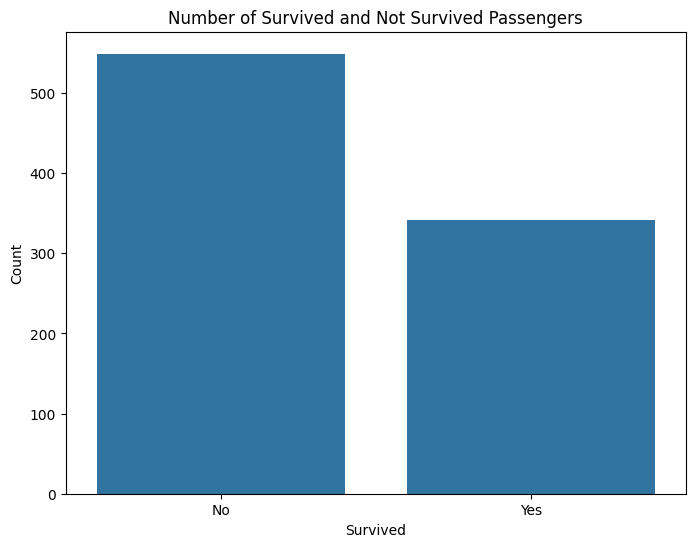

In [8]:
survivors_count = df['Survived'].value_counts()

survivors_count = survivors_count.rename({0: 'No', 1: 'Yes'})

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=survivors_count.index, y=survivors_count.values, ax=ax)

ax.set_xlabel('Survived')
ax.set_ylabel('Count')
ax.set_title('Number of Survived and Not Survived Passengers')

plt.show()

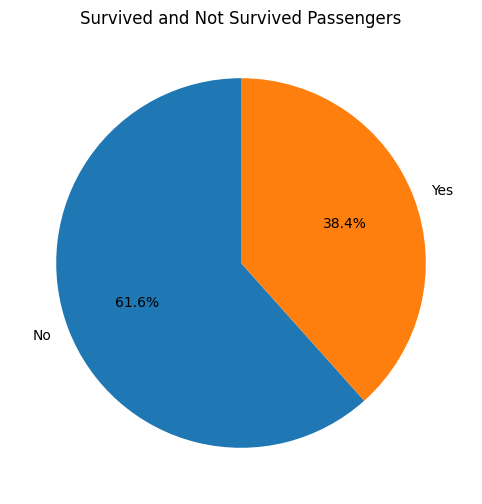

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(survivors_count, labels=survivors_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Survived and Not Survived Passengers')
plt.show()

**Let's now examine the distribution of passengers who survived on the Titanic based on gender:**

In [10]:
# calculate % of survived by gender

man_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
woman_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]

man_survived_per = man_survived / df[df['Sex'] == 'male'].shape[0]
woman_survived_per = woman_survived / df[df['Sex'] == 'female'].shape[0]

print(f"Percentage of men survived: {man_survived_per * 100:.2f}%, ({man_survived} people)")
print(f"Percentage of women survived: {woman_survived_per * 100:.2f}% ({woman_survived} people)")

Percentage of men survived: 18.89%, (109 people)
Percentage of women survived: 74.20% (233 people)


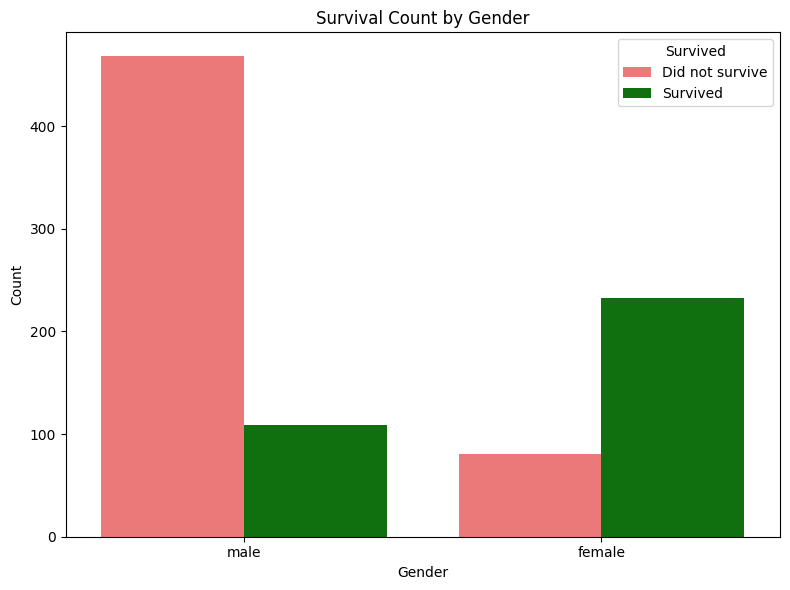

In [11]:
# visualization % of survived by gender

plt.figure(figsize=(8,6))
sns.countplot(x="Sex", hue="Survived", data=df, palette={0: "#FF6666", 1: "green"})

plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Did not survive", "Survived"])
plt.tight_layout()
plt.show()

It is clearly visible that the percentage of women who survived (74.20%) was significantly higher compared to men (18.89%).

I want to handle missing values in age column. Let's   explore which features might be correlated with a passenger's age.

**Numerical columns:**

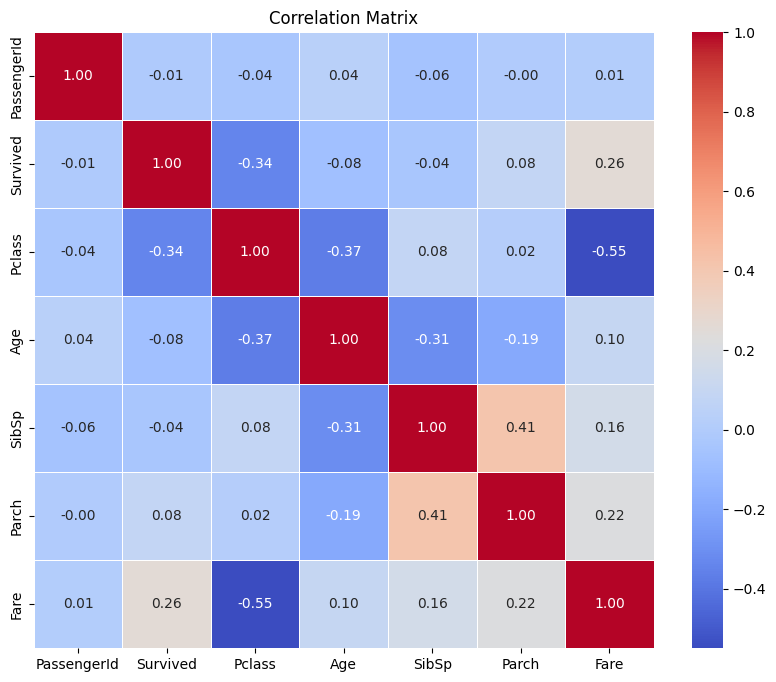

In [12]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Some categorical that may be correlated:**

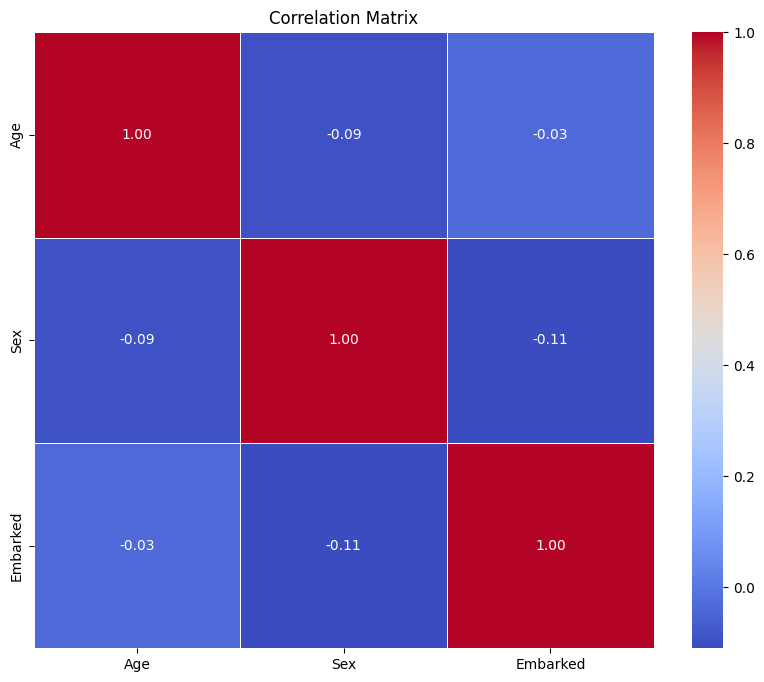

In [13]:
# correlation with Sex and Embarked
df_mod = df.copy()

df_mod['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df_mod['Embarked'] = df_mod['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


correlation_matrix = df_mod[['Age', 'Sex', 'Embarked']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix, we can see that **Age** is most strongly correlated with **Pclass** and **SibSp**. This makes sense, as older passengers were generally more likely to afford higher-class cabins.

**Let's take a closer look at age in relation to passenger class:**

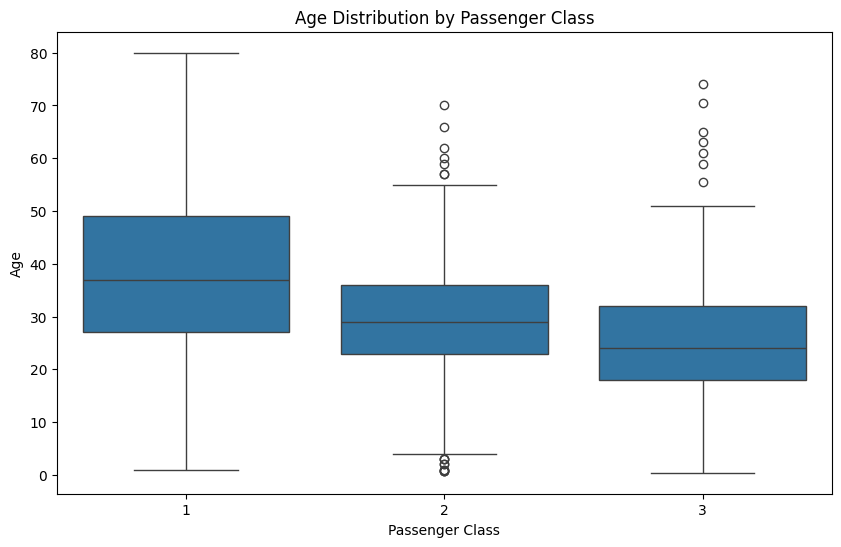

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

In [15]:
mean_age_class1 = df[df['Pclass'] == 1]['Age'].mean()
mean_age_class2 = df[df['Pclass'] == 2]['Age'].mean()
mean_age_class3 = df[df['Pclass'] == 3]['Age'].mean()

print(f"Mean age in class 1: {mean_age_class1:.2f}")
print(f"Mean age in class 2: {mean_age_class2:.2f}")
print(f"Mean age in class 3: {mean_age_class3:.2f}")

Mean age in class 1: 38.23
Mean age in class 2: 29.88
Mean age in class 3: 25.14


We can see that the higher the class, the older the passengers. I will fill the missing age values with the mean age for each passenger class:

In [16]:
df_cleaned_age = df.copy()
df_cleaned_age['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

# Check the result
df_cleaned_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Let's look at the distribution of passengers' age after filling missing values:**

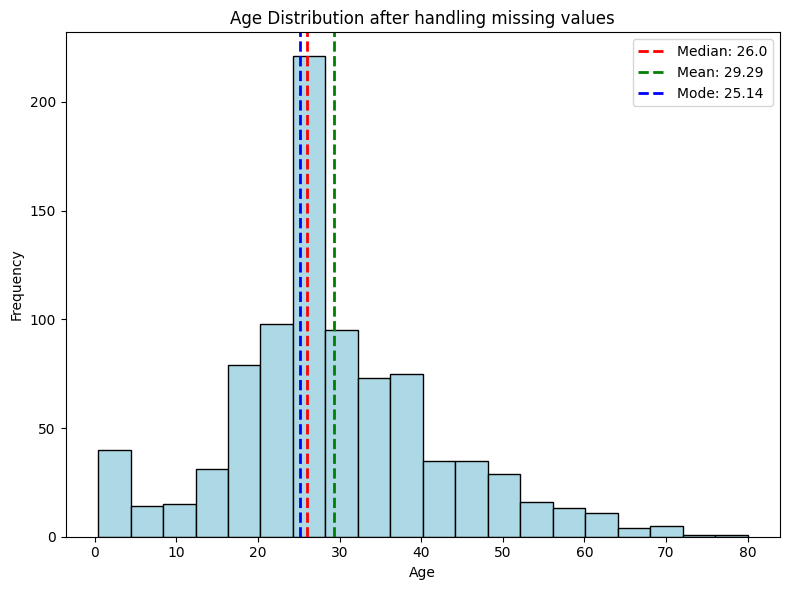

In [17]:
median_age = np.median(df_cleaned_age['Age'])
mean_age = np.mean(df_cleaned_age['Age'])
mode_age = df_cleaned_age['Age'].mode()[0]

plt.figure(figsize=(8,6))
plt.hist(df_cleaned_age['Age'], bins=20, color='lightblue', edgecolor='black')
plt.title('Age Distribution after handling missing values')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.axvline(median_age, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median_age}')
plt.axvline(mean_age, color='g', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(mode_age, color='b', linestyle='dashed', linewidth=2, label=f'Mode: {mode_age:.2f}')


plt.legend()
plt.tight_layout()
plt.show()

We can see that most of the passnegers are in age between 16 and 40.

Now I am going to create age groups, that may be interesting and usefull for training predictive model:

In [18]:
# creating age groups
bins = [0, 16, 32, 48, 64, 100]
labels = ['0-16', '16-32', '32-48', '48-64', '64+']


df_cleaned_age['AgeGroup'] = pd.cut(df_cleaned_age['Age'], bins=bins, labels=labels, right=True)


print(df_cleaned_age[['Age', 'AgeGroup']].head())

    Age AgeGroup
0  22.0    16-32
1  38.0    32-48
2  26.0    16-32
3  35.0    32-48
4  35.0    32-48


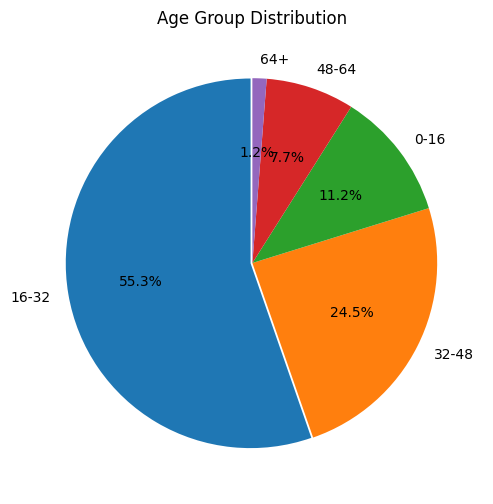

In [19]:
# pie chart to visualize age groups
age_group_counts = df_cleaned_age['AgeGroup'].value_counts()



explode = [0.01 if i == age_group_counts.idxmax() else 0 for i in df_cleaned_age['AgeGroup'].unique()]

fig, ax = plt.subplots(figsize=(8, 6))

ax.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, explode=explode)

ax.set_title('Age Group Distribution')

plt.show()

We can see that more than half of the passengers are in age group 16-32 and almost 80% are in age group 16-48.

**Let’s see how many people boarded at each embarkation point:**

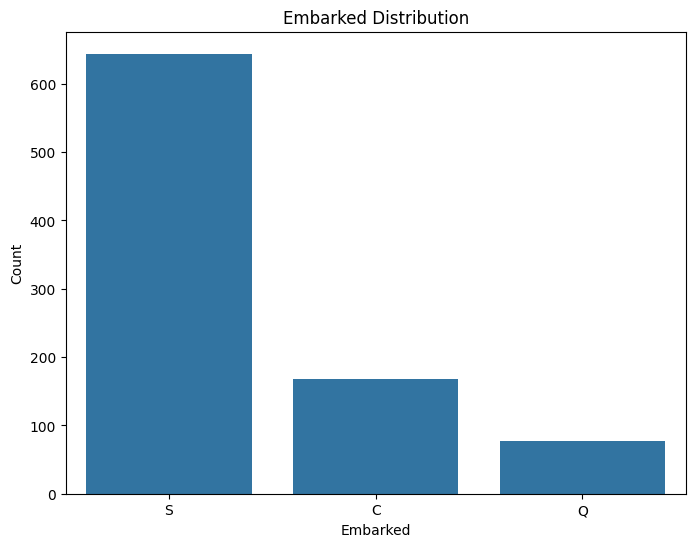

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df_cleaned_age)
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

!

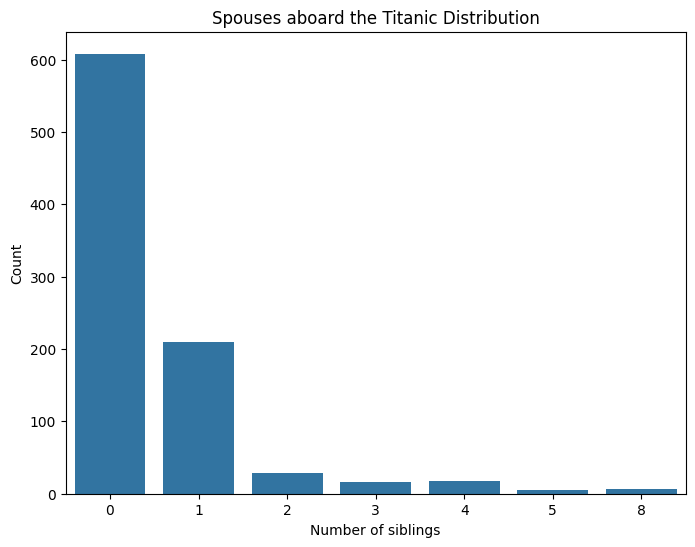

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', data=df_cleaned_age)
plt.title('Spouses aboard the Titanic Distribution')
plt.xlabel('Number of siblings')
plt.ylabel('Count')
plt.show()

!

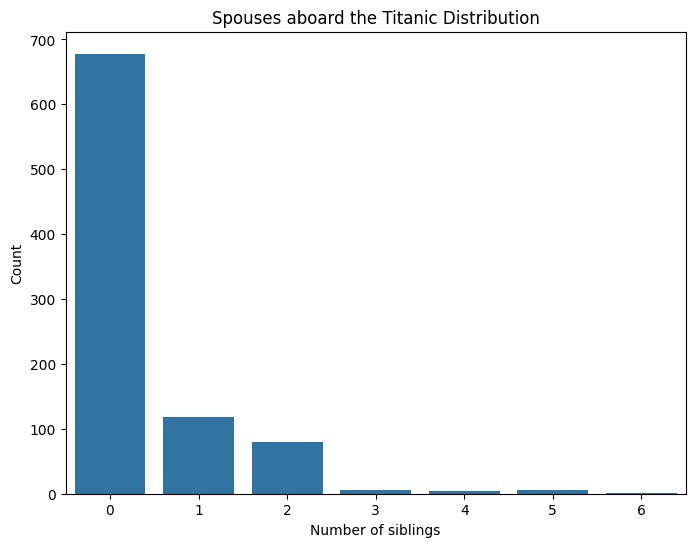

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Parch', data=df_cleaned_age)
plt.title('Spouses aboard the Titanic Distribution')
plt.xlabel('Number of siblings')
plt.ylabel('Count')
plt.show()

**Let's create a column that indicates how many family members of a particular person were on the ship:**

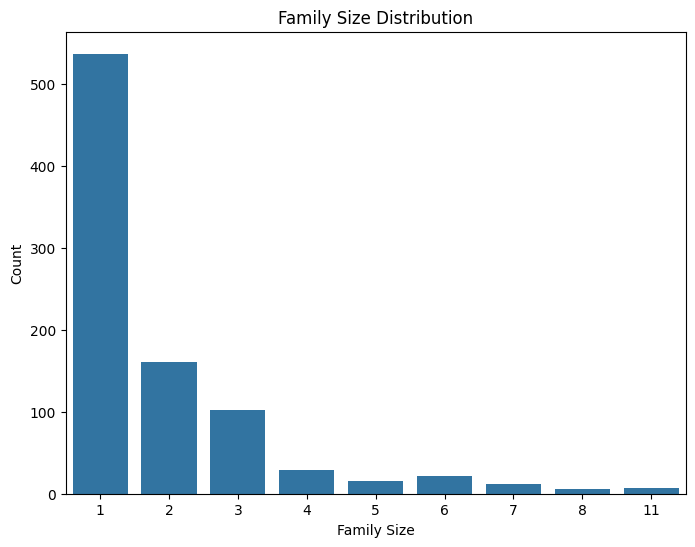

In [23]:
df_cleaned_age['FamilySize'] = df_cleaned_age['SibSp'] + df_cleaned_age['Parch'] + 1 # also include this person

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='FamilySize', data=df_cleaned_age)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

A value of 1 indicates that a person was alone. Therefore, we can see that most passengers were without their family. Let's create a pie chart that shows how many % of passengers were alone:

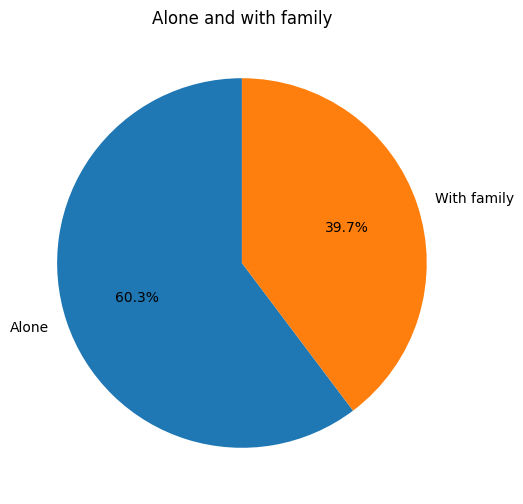

In [24]:
alone_df = df_cleaned_age[df_cleaned_age['FamilySize'] == 1]

alone_count = alone_df.shape[0]
not_alone_count = df_cleaned_age.shape[0] - alone_count

alone_percentage = (alone_count / not_alone_count) * 100

fig,ax = plt.subplots(figsize=(8,6))

labels = ['Alone', 'With family']

plt.pie([alone_count, not_alone_count], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Alone and with family')
plt.show()

**Now let's try to find which columns may be correlated with whether someone survived. That will be helpful in selecting features for the model. Let's have a look at the correlation matrix again.**

**Numerical columns:**

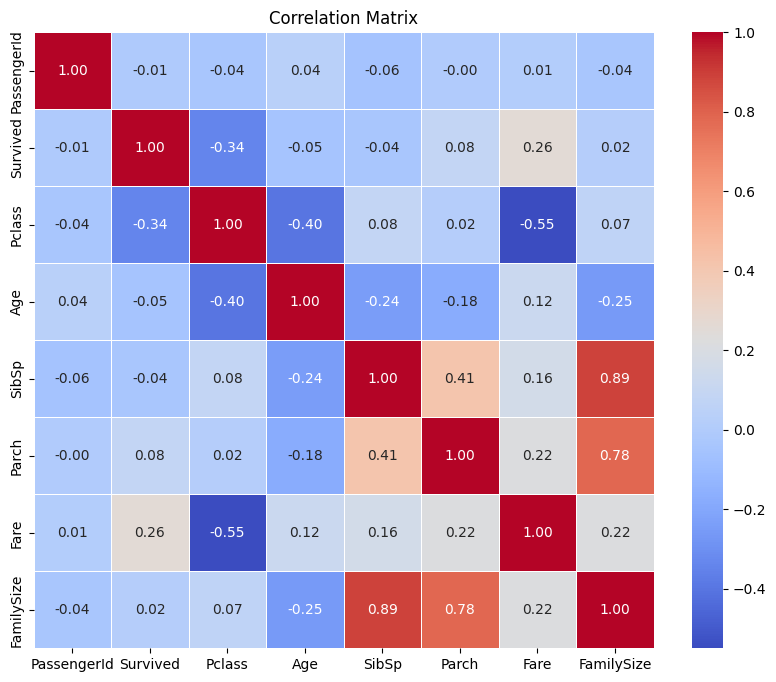

In [25]:
correlation_matrix = df_cleaned_age.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

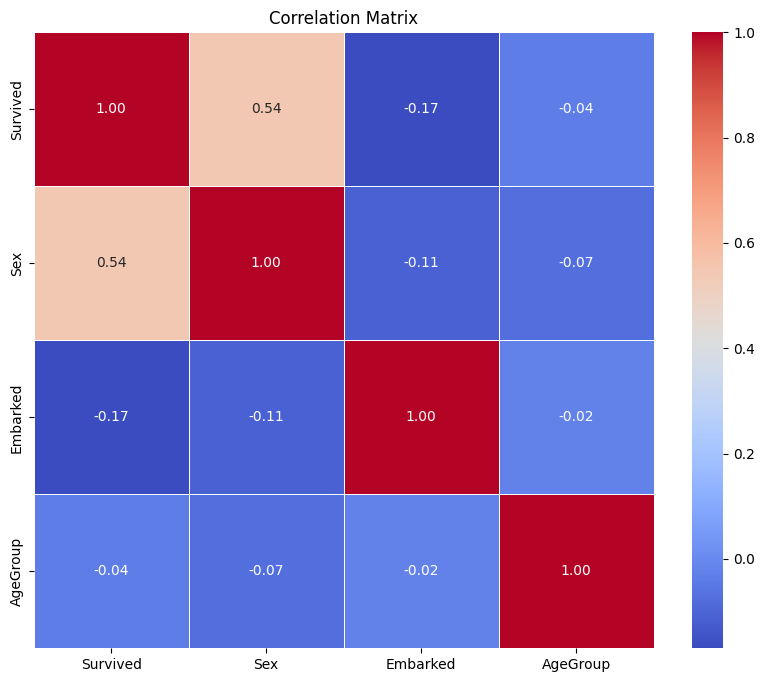

In [26]:
df_mod = df_cleaned_age.copy()
df_mod['Sex'] = df_mod['Sex'].map({'male': 0, 'female': 1})
df_mod['Embarked'] = df_mod['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_mod['AgeGroup'] = df_mod['AgeGroup'].map({'0-16': 0, '16-32': 1, '32-48': 2, '48-64': 3, '64+': 4})


correlation_matrix = df_mod[['Survived', 'Sex', 'Embarked','AgeGroup']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the two matrices above, it can be seen that 'Sex' and 'Pclass' are the most correlated. We can ignore the 'Fare' column as it is likely strongly dependent on 'Pclass'. I previously showed that 'Sex' had an influence, so now let's examine the 'Pclass' column:

<ipython-input-27-379874900251>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pclass_survival.index, y=pclass_survival.values, ax=ax, palette='coolwarm')


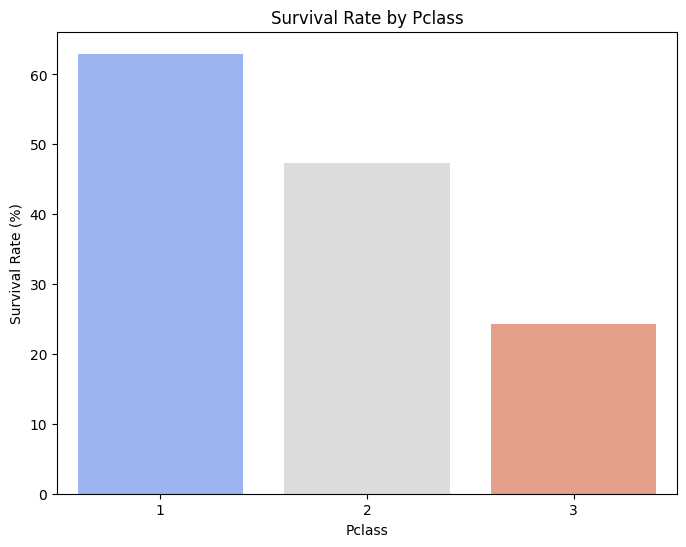

In [27]:
pclass_survival = df_cleaned_age.groupby('Pclass')['Survived'].mean() * 100

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=pclass_survival.index, y=pclass_survival.values, ax=ax, palette='coolwarm')

ax.set_xlabel('Pclass')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival Rate by Pclass')

plt.show()

The matrix doesn't show a correlation between age and survival, but there may still be a relationship, despite the lack of correlation, and now we will check that:

<ipython-input-28-bfac6126d714>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df_cleaned_age.groupby('AgeGroup')['Survived'].mean() * 100
<ipython-input-28-bfac6126d714>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_survival.index, y=age_group_survival.values, ax=ax, palette='coolwarm')


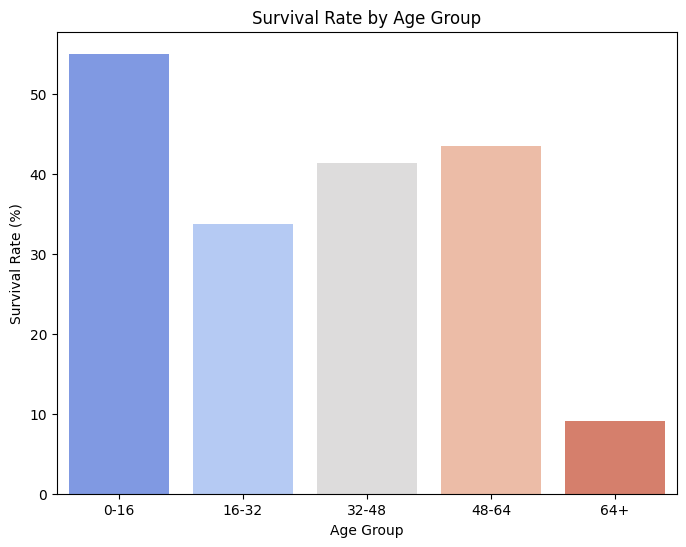

In [28]:
age_group_survival = df_cleaned_age.groupby('AgeGroup')['Survived'].mean() * 100

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=age_group_survival.index, y=age_group_survival.values, ax=ax, palette='coolwarm')

ax.set_xlabel('Age Group')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival Rate by Age Group')

plt.show()

We can see that people in age group 0-16 are most likely to survive, meanwhile only about 10% percent of people 64+ survived.

**I would also like to check how does it look for children:**

<ipython-input-29-d31cc6116fe2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_children.index, y=df_children.values, ax=ax, palette='coolwarm')


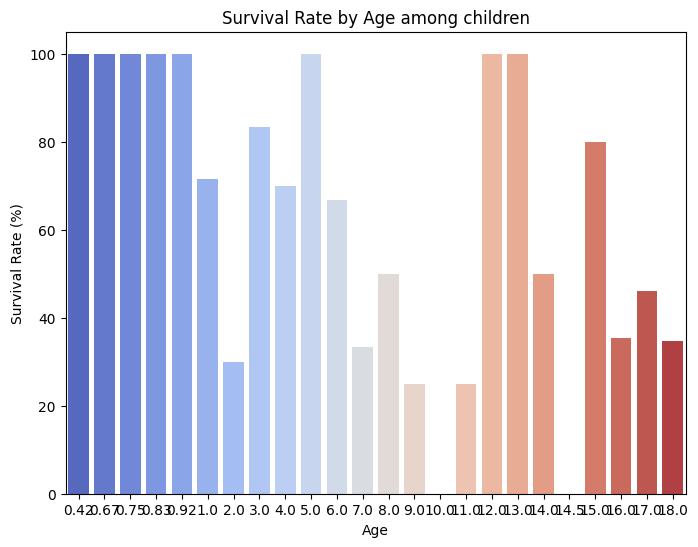

In [29]:
df_children = df_cleaned_age[df_cleaned_age['Age'] <= 18]
df_children = df_children.groupby('Age')['Survived'].mean() * 100

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_children.index, y=df_children.values, ax=ax, palette='coolwarm')

ax.set_xlabel('Age')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival Rate by Age among children')

plt.show()

We can see that almost every baby survived.

**Examining other columns:**

- **Embarked**

<ipython-input-30-453e47ec21d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_survival.index, y=embarked_survival.values, ax=ax, palette='coolwarm')


Text(0, 0.5, 'Survival Rate (%)')

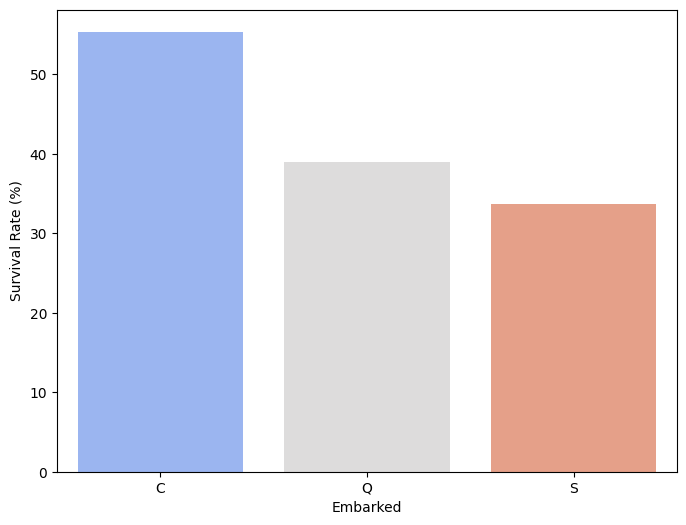

In [30]:
embarked_survival = df_cleaned_age.groupby('Embarked')['Survived'].mean() * 100

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=embarked_survival.index, y=embarked_survival.values, ax=ax, palette='coolwarm')

ax.set_xlabel('Embarked')
ax.set_ylabel('Survival Rate (%)')

I think that it doesn't really have the influence on survival. It is likely dependent on the class of the passengers who boarded at each port and amount od them:

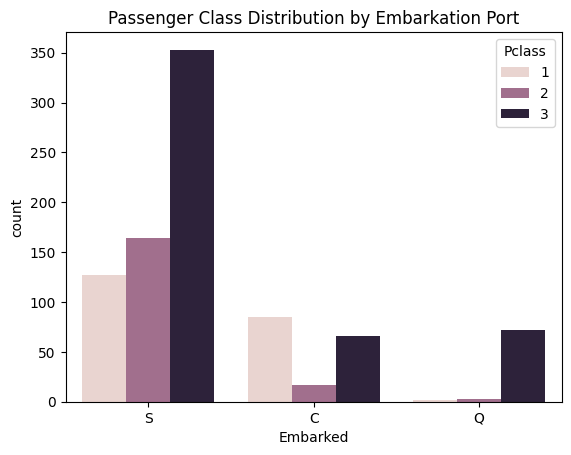

In [31]:
sns.countplot(data=df_cleaned_age, x='Embarked', hue='Pclass')
plt.title('Passenger Class Distribution by Embarkation Port')
plt.show()

We can see that people with embarked 'S' are very often in third class and they are most common on the ship. That is a reason why they have smallest survival rate.

- **Num of siblings / spouses aboard the Titanic**

<ipython-input-32-f94fe10506de>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_grouped_by_sibsp.index, y=df_grouped_by_sibsp.values, ax=ax, palette='coolwarm')


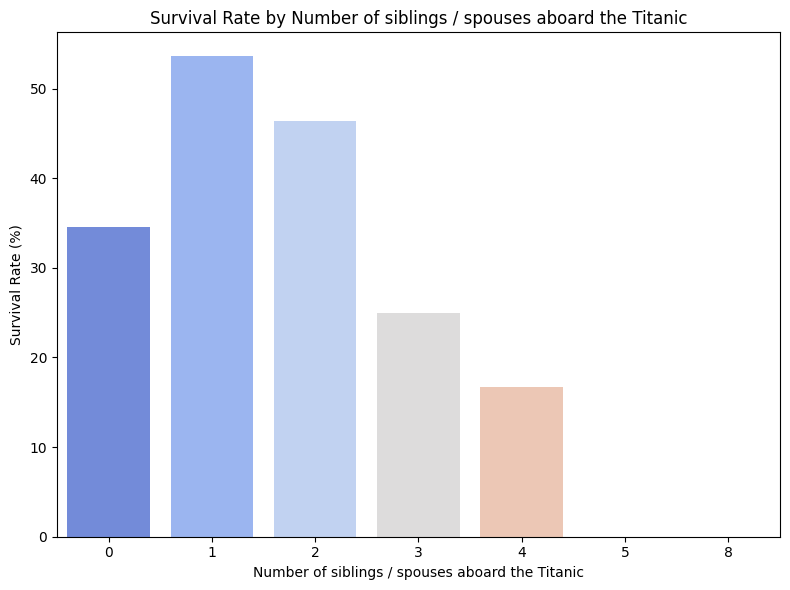

In [32]:

df_grouped_by_sibsp = df_cleaned_age.groupby('SibSp')['Survived'].mean() * 100

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_grouped_by_sibsp.index, y=df_grouped_by_sibsp.values, ax=ax, palette='coolwarm')

ax.set_xlabel('Number of siblings / spouses aboard the Titanic')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival Rate by Number of siblings / spouses aboard the Titanic')

plt.tight_layout()
plt.show()

- **Num of parents / children aboard the Titanic**

<ipython-input-33-076747b814ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_grouped_by_parch.index, y=df_grouped_by_parch.values, ax=ax, palette='coolwarm')


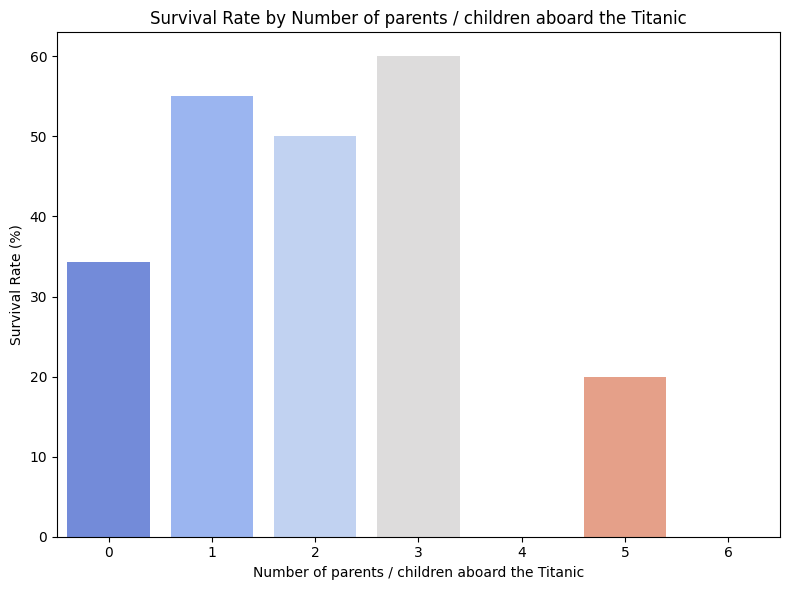

In [33]:
df_grouped_by_parch = df_cleaned_age.groupby('Parch')['Survived'].mean() * 100

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_grouped_by_parch.index, y=df_grouped_by_parch.values, ax=ax, palette='coolwarm')

ax.set_xlabel('Number of parents / children aboard the Titanic')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival Rate by Number of parents / children aboard the Titanic')

plt.tight_layout()
plt.show()

- **New column - family group**

<ipython-input-34-42e9257ab915>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_family_group = df_cleaned_age.groupby('FamilyGroup')['Survived'].mean() * 100
<ipython-input-34-42e9257ab915>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_family_group.index, y=survival_by_family_group.values, ax=ax, palette='coolwarm')


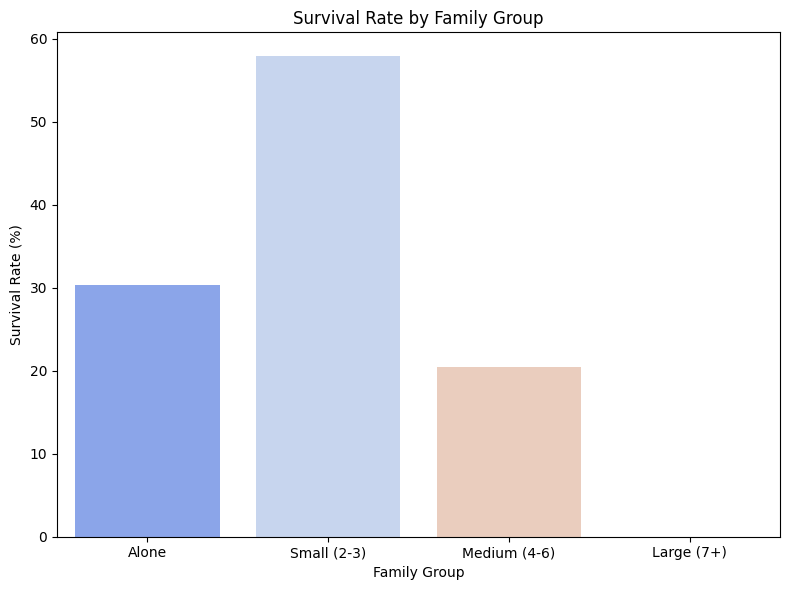

In [34]:
df_cleaned_age['FamilyGroup'] = pd.cut(df_cleaned_age['FamilySize'], bins=[0,1,4,7,100], labels=['Alone', 'Small (2-3)', 'Medium (4-6)', 'Large (7+)'])

survival_by_family_group = df_cleaned_age.groupby('FamilyGroup')['Survived'].mean() * 100

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=survival_by_family_group.index, y=survival_by_family_group.values, ax=ax, palette='coolwarm')

ax.set_xlabel('Family Group')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival Rate by Family Group')

plt.tight_layout()
plt.show()

The highest survival rate is observed in the "Small" family group. This suggests that passengers with small families had a higher chance of survival compared to those in larger or smaller family groups.

- **Fare**

In [35]:
df_cleaned_age['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<ipython-input-36-c56fd97d6fb4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_grouped_by_fare.index, y=df_grouped_by_fare.values, ax=ax, palette='coolwarm')


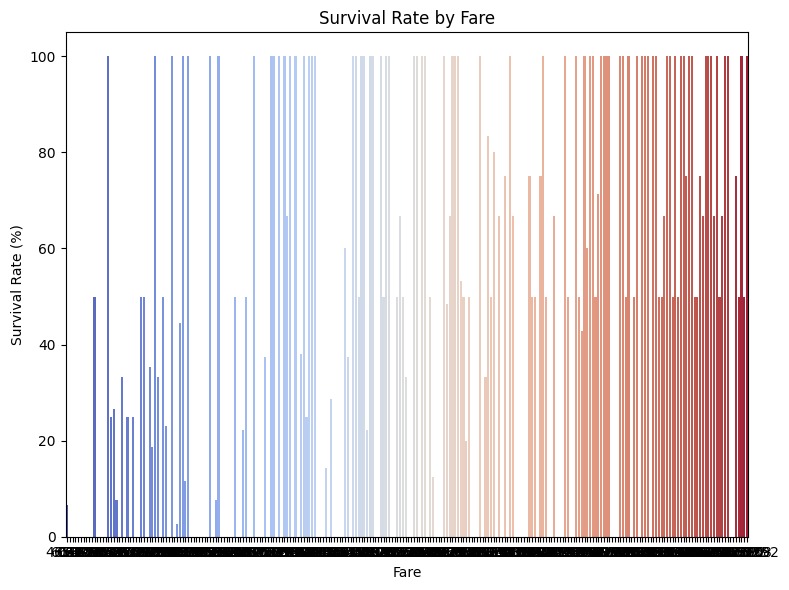

In [36]:
# fare
df_grouped_by_fare = df_cleaned_age.groupby('Fare')['Survived'].mean() * 100

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=df_grouped_by_fare.index, y=df_grouped_by_fare.values, ax=ax, palette='coolwarm')

ax.set_xlabel('Fare')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival Rate by Fare')

plt.tight_layout()
plt.show()

Fare might be useful or not. I will train one model including this column, transformed by StandardScaler, and one without it.

## **5. Transforming data for building model**

Let's look again on train dat and check test data

In [37]:
train = df.copy()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


We can see that in test set we also have missing values in Age and Cabin. However we also have one missing value in fare. We will fill it with mean based on Pclass

In [39]:
def transformations(data):
  # filliing nan in Age
  data["Age"] = data.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.mean()))

  # filling nan in Fare
  data["Fare"] = data.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.mean()))

  #Standar scaler for fare
  scaler = StandardScaler()
  data['Fare'] = scaler.fit_transform(data[['Fare']])

  # adding age group column
  bins = [0, 1, 16, 32, 48, 64, 100]
  labels = ['0-1',' 1-16', '16-32', '32-48', '48-64', '64+']
  data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

  #one-hot encodding for age group
  data = pd.get_dummies(data, columns=['AgeGroup'])

  #one-hot for sex
  data = pd.get_dummies(data, columns=['Sex'])



  # Family size, Family group and one-hot encodding
  data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
  data['FamilyGroup'] = pd.cut(data['FamilySize'], bins=[0,1,4,7,100], labels=['Alone', 'Small', 'Medium', 'Large'])
  data = pd.get_dummies(data, columns=['FamilyGroup'])


  # dropping columns that I will not use for 100%
  data = data.drop(columns=['Name', 'Ticket', 'Cabin','Embarked'])

  return data

In [40]:
train = transformations(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Age                 891 non-null    float64
 4   SibSp               891 non-null    int64  
 5   Parch               891 non-null    int64  
 6   Fare                891 non-null    float64
 7   AgeGroup_0-1        891 non-null    bool   
 8   AgeGroup_ 1-16      891 non-null    bool   
 9   AgeGroup_16-32      891 non-null    bool   
 10  AgeGroup_32-48      891 non-null    bool   
 11  AgeGroup_48-64      891 non-null    bool   
 12  AgeGroup_64+        891 non-null    bool   
 13  Sex_female          891 non-null    bool   
 14  Sex_male            891 non-null    bool   
 15  FamilySize          891 non-null    int64  
 16  FamilyGr

In [41]:
test = transformations(test)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Age                 418 non-null    float64
 3   SibSp               418 non-null    int64  
 4   Parch               418 non-null    int64  
 5   Fare                418 non-null    float64
 6   AgeGroup_0-1        418 non-null    bool   
 7   AgeGroup_ 1-16      418 non-null    bool   
 8   AgeGroup_16-32      418 non-null    bool   
 9   AgeGroup_32-48      418 non-null    bool   
 10  AgeGroup_48-64      418 non-null    bool   
 11  AgeGroup_64+        418 non-null    bool   
 12  Sex_female          418 non-null    bool   
 13  Sex_male            418 non-null    bool   
 14  FamilySize          418 non-null    int64  
 15  FamilyGroup_Alone   418 non-null    bool   
 16  FamilyGr

Now I am going to drop some columns. Then I will split data into training and testing set with test_size = 0.2:

In [42]:
X = train.drop(columns=['PassengerId','Survived','Age','SibSp','Parch','FamilySize',])
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

test = test.drop(columns=['Age','SibSp','Parch','FamilySize'])

## **6. Selectig and training model**

I will evaluate the models using metrics like accuracy, precision, recall, F1 score and display the results in confusion matrices:

In [43]:
#Models to test
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

results = []

# Testowanie modeli
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    #other metrics on test set
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    results.append({"Model": name, "Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1})

    print(f"{name} Performance:")
    print(classification_report(y_test, y_pred_test))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    print(30*'-')



results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
[[99 11]
 [21 48]]
------------------------------
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.72      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix:
[[91 19]
 [21 48]]
------------------------------
Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       110
           1  

In [44]:
# Show results
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                 Model  Train Accuracy  Test Accuracy  Precision    Recall  \
4                  SVM        0.828652       0.826816   0.806452  0.724638   
0  Logistic Regression        0.811798       0.821229   0.813559  0.695652   
5                  KNN        0.859551       0.821229   0.768116  0.768116   
3    Gradient Boosting        0.893258       0.804469   0.774194  0.695652   
1        Random Forest        0.938202       0.776536   0.716418  0.695652   
6              XGBoost        0.922753       0.770950   0.712121  0.681159   
2        Decision Tree        0.938202       0.759777   0.709677  0.637681   

   F1 Score  
4  0.763359  
0  0.750000  
5  0.768116  
3  0.732824  
1  0.705882  
6  0.696296  
2  0.671756  


We can see that models are overfitting, especially Decision Tree and Random Forest.

<ipython-input-45-a69091ba9320>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm', len(results_df))


Text(0, 0.5, 'Test Accuracy')

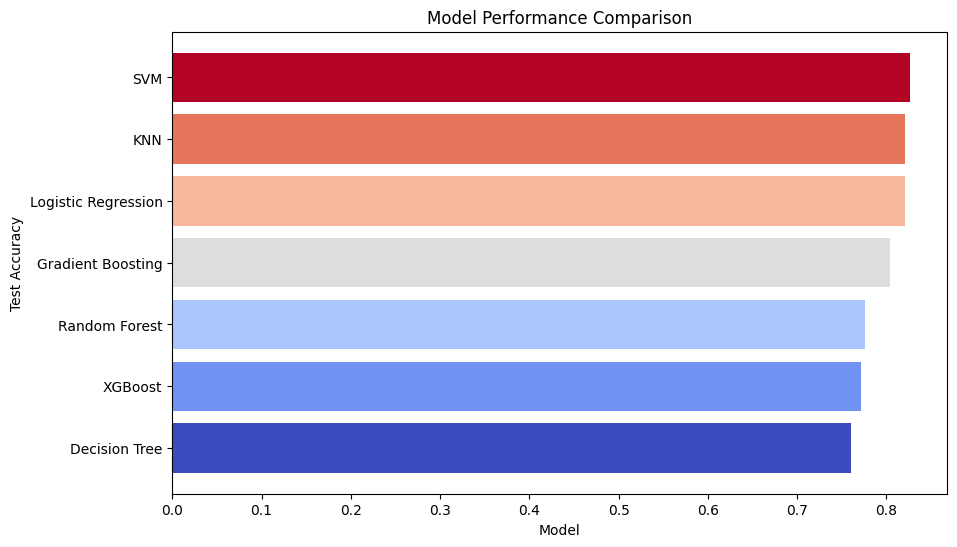

In [45]:
#Visualize models' performance on test set
results_df = results_df.sort_values(by='Test Accuracy', ascending=True)

plt.figure(figsize=(10, 6))

cmap = plt.cm.get_cmap('coolwarm', len(results_df))

plt.barh(results_df['Model'], results_df['Test Accuracy'], color=cmap(range(len(results_df))))

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')

## **7. Making predictions on test data and saving**

In [46]:
X_test = test.drop(columns=['PassengerId'])

In [47]:
X_test.shape

(418, 14)

In [48]:
#SVM


svm = SVC(random_state=42)
svm.fit(X, y)
y_pred = svm.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('SVCsubmission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [49]:
#XGBoost

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X, y)
y_pred = xgb_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('XGBsubmission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [50]:
#Gradient boosting

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X, y)
y_pred = gb_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('GBsubmission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [51]:
#DT


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)
y_pred = dt.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('DTsubmission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


The best model achieved a score just below **0.78** on the test dataset

## 8.**Trying to reduce overfitting**

I will try to reduce overfitting in order to improve results on test set. I am  going to drop columns indicating size of the family (except one pointing on the people who are alone) and fare.

In [52]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle competitions/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle competitions/Titanic/test.csv')

In [53]:
train = transformations(df)
test = transformations(test)

In [54]:
to_drop = ['Age', 'SibSp', 'Parch', 'FamilySize','PassengerId', 'Fare','FamilyGroup_Small','FamilyGroup_Medium','FamilyGroup_Large']


X = train.drop(columns=['Survived']).drop(columns=to_drop)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

test = test.drop(columns=to_drop)

In [55]:
# Models to test
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

results = []

# Training models
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    results.append({"Model": name, "Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1})

    print(f"{name} Performance:")
    print(classification_report(y_test, y_pred_test))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    print(30*'-')



results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.74      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix:
[[94 16]
 [23 46]]
------------------------------
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       110
           1       0.79      0.59      0.68        69

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179

Confusion Matrix:
[[99 11]
 [28 41]]
------------------------------
Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       110
           1  

In [56]:
# Show results
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                 Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.808989       0.782123   0.741935  0.666667   
1        Random Forest        0.831461       0.782123   0.788462  0.594203   
2        Decision Tree        0.831461       0.782123   0.788462  0.594203   
6              XGBoost        0.831461       0.782123   0.788462  0.594203   
3    Gradient Boosting        0.830056       0.776536   0.773585  0.594203   
4                  SVM        0.814607       0.776536   0.763636  0.608696   
5                  KNN        0.654494       0.586592   0.471910  0.608696   

   F1 Score  
0  0.702290  
1  0.677686  
2  0.677686  
6  0.677686  
3  0.672131  
4  0.677419  
5  0.531646  


<ipython-input-57-f6fbb1d34bfd>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm', len(results_df))


Text(0, 0.5, 'Test Accuracy')

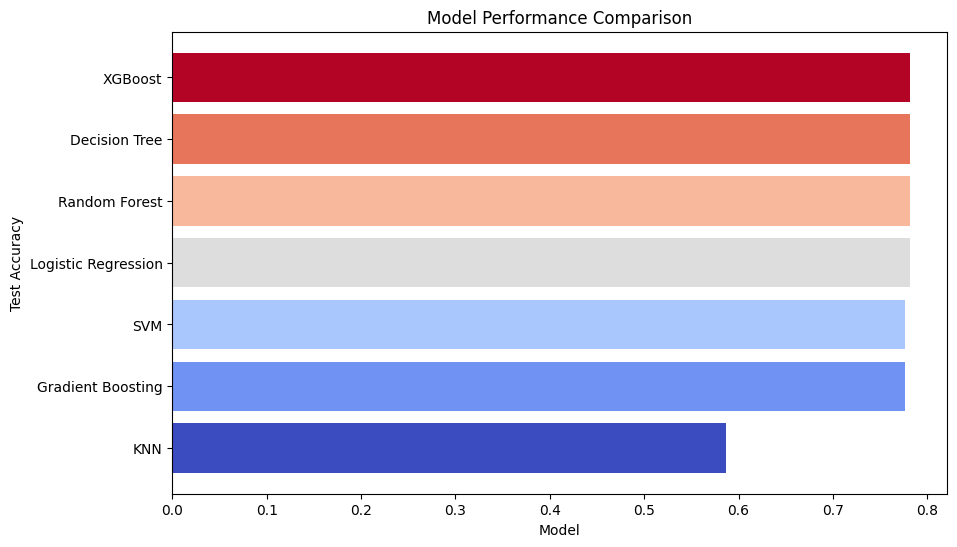

In [57]:
#Visualize models' performance
results_df = results_df.sort_values(by='Test Accuracy', ascending=True)

plt.figure(figsize=(10, 6))

cmap = plt.cm.get_cmap('coolwarm', len(results_df))

plt.barh(results_df['Model'], results_df['Test Accuracy'], color=cmap(range(len(results_df))))

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')

We observed that both the training accuracy and test accuracy decreased as more columns were dropped. However, with the reduction in the number of features, we achieved higher precision. This suggests that while the overall performance on the training and test datasets may have declined, the model's ability to correctly identify positive instances improved. It’s possible that these models will perform better when evaluated on the test dataset.

In [58]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle competitions/Titanic/test.csv')
test = transformations(test)
X_test = test.drop(columns=to_drop)

In [59]:
X_test.shape

(418, 10)

In [60]:
#DT


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)
y_pred = dt.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('DTsubmission.csv', index=False)
print("Your submission was successfully saved!")

# Achieved best results on test set - 0.78229

Your submission was successfully saved!


In [61]:
#XGBoost

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X, y)
y_pred = xgb_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('XGBsubmission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [62]:
#Gradient boosting

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X, y)
y_pred = gb_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('GBsubmission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [63]:
#KNN


knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('KNNsubmission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [64]:
#Logistic R


lr = LogisticRegression(random_state=42)
lr.fit(X, y)
y_pred = lr.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('LRsubmission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Finally the **DecisionTreeClassifier** trained on dataset with reduced number of features achieved best result: **0.78229** on Kaggle test dataset.

## 9. UPDATE: Another approach

Now I will use things like:
- Pieplines
- Transormers
- Plot confusion matrix
- GridSearchCV
- StratifiedKfold

In [65]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle competitions/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle competitions/Titanic/test.csv')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
# create column Alone
df['Alone'] = df['SibSp'] + df['Parch']
df['Alone'] = df['Alone'].apply(lambda x: 0 if x > 0 else 1)


# Select features
features = ['Pclass', 'Sex', 'Age', 'Alone', 'Fare']
target = 'Survived'

X = df[features]
y = df[target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [68]:
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [69]:
numerical_features

['Pclass', 'Age', 'Alone', 'Fare']

In [70]:
categorical_features

['Sex']

In [71]:
# transformers
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [72]:
#Creating pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [73]:
#Creating random forest model
from sklearn.model_selection import  GridSearchCV, cross_val_score, StratifiedKFold

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True)

In [74]:
model = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy',verbose=2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.9s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.9s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   1.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   2.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.8s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'Alone',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [75]:
print("Best parameters:", model.best_params_)
print("Best cross-validation score:", model.best_score_)

Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation score: 0.8258642765685019


In [76]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



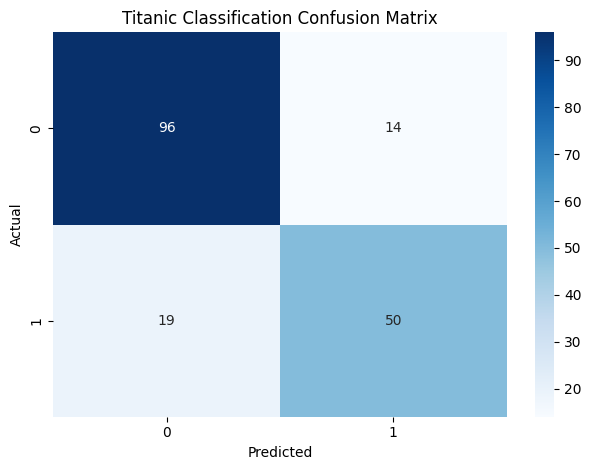

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_valid, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [78]:
#Random forest
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle competitions/Titanic/test.csv')

test['Alone'] = test['SibSp'] + test['Parch']
test['Alone'] = test['Alone'].apply(lambda x: 0 if x > 0 else 1)


X_test = test[features]

# Best model (includes transformations)
rf = model.best_estimator_
rf.fit(X, y)
y_pred = rf.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('NEW_RFsubmission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [79]:
#SVM
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
    'classifier__kernel': ['linear', 'rbf', 'poly'],  # Typ jądra
    'classifier__gamma': ['scale', 'auto'],  # Parametr dla jądra rbf/poly
    'classifier__degree': [2, 3, 4]  # Tylko dla jądra 'poly'
}


cv = StratifiedKFold(n_splits=5, shuffle=True)

model = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy',verbose=2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=linear; total time=   0.1s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=linear; total time=   0.1s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=linear; total time=   0.1s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=linear; total time=   0.1s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=linear; total time=   0.1s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.1s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=rbf

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'Alone',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex'])])),
                                       ('classifier', SVC(random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__degree': [2, 3, 4],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [80]:
print("Best parameters:", model.best_params_)
print("Best cross-validation score:", model.best_score_)

Best parameters: {'classifier__C': 10, 'classifier__degree': 3, 'classifier__gamma': 'auto', 'classifier__kernel': 'poly'}
Best cross-validation score: 0.823096621688171


In [81]:
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       110
           1       0.88      0.61      0.72        69

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.83      0.82      0.81       179



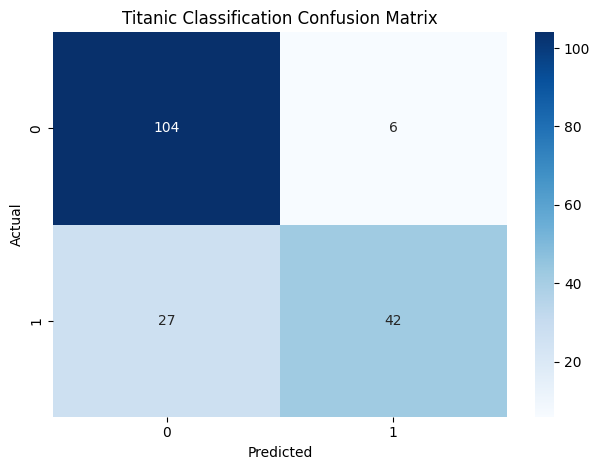

In [82]:
conf_matrix = confusion_matrix(y_valid, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [83]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle competitions/Titanic/test.csv')

test['Alone'] = test['SibSp'] + test['Parch']
test['Alone'] = test['Alone'].apply(lambda x: 0 if x > 0 else 1)


X_test = test[features]

# Best model (includes transformations)
rf = model.best_estimator_
rf.fit(X, y)
y_pred = rf.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
output.to_csv('NEW_SVMsubmission.csv', index=False)
print("Your submission was successfully saved!")

#As well as the best model so far

Your submission was successfully saved!
